<a href="https://colab.research.google.com/github/serikovole/projects/blob/main/StudentPerfFactors_DTRegressor_Optuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd

In [21]:
pip install optuna

In [22]:
student_data = pd.read_csv("/content/StudentPerformanceFactors.csv")
student_data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [23]:
student_data = student_data.dropna(axis=0)


In [24]:
student_data.T.stack().groupby(level=0).apply(lambda x: x.unique().tolist())

,0
Access_to_Resources,"[High, Medium, Low]"
Attendance,"[84, 64, 98, 89, 92, 88, 78, 94, 80, 97, 83, 8..."
Distance_from_Home,"[Near, Moderate, Far]"
Exam_Score,"[67, 61, 74, 71, 70, 66, 69, 72, 68, 65, 64, 6..."
Extracurricular_Activities,"[No, Yes]"
Family_Income,"[Low, Medium, High]"
Gender,"[Male, Female]"
Hours_Studied,"[23, 19, 24, 29, 25, 17, 21, 9, 10, 14, 22, 15..."
Internet_Access,"[Yes, No]"
Learning_Disabilities,"[No, Yes]"


In [25]:
pd.set_option('future.no_silent_downcasting', True)

student_data = student_data.replace(['Yes','No'],[1,0])
student_data = student_data.replace(['Low','Medium','High'],[0,1,2])
student_data = student_data.replace(['Public','Private'],[0,1])
student_data = student_data.replace(['Positive','Negative','Neutral'],[1,0,2])
student_data = student_data.replace(['Near','Moderate','Far'],[0,1,2])
student_data = student_data.replace(['Male','Female'],[1,0])
student_data = student_data.replace(['High School','College','Postgraduate'],[0,1,2])

In [26]:
y = student_data.pop("Exam_Score")
X = student_data

In [27]:
import optuna
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

def objective(trial):
    max_depth = trial.suggest_int('max_depth', 1, 200)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 500)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 1000)

    model = DecisionTreeRegressor(max_depth=max_depth,
                                  min_samples_leaf=min_samples_leaf,
                                  min_samples_split=min_samples_split)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    val_predictions = model.predict(X_val)
    val_error = mean_absolute_error(y_val, val_predictions)

    return val_error

In [28]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print(f"Best parameters: {study.best_params}")
print(f"Best validation MAE: {study.best_value}")

[I 2024-12-20 11:48:46,896] A new study created in memory with name: no-name-29eb7471-68a2-44bb-8fd4-b063b834dc21
[I 2024-12-20 11:48:46,933] Trial 0 finished with value: 1.8787256128955134 and parameters: {'max_depth': 49, 'min_samples_leaf': 486, 'min_samples_split': 869}. Best is trial 0 with value: 1.8787256128955134.
[I 2024-12-20 11:48:46,973] Trial 1 finished with value: 1.7817499819064389 and parameters: {'max_depth': 69, 'min_samples_leaf': 299, 'min_samples_split': 715}. Best is trial 1 with value: 1.7817499819064389.
[I 2024-12-20 11:48:47,011] Trial 2 finished with value: 1.7817499819064389 and parameters: {'max_depth': 37, 'min_samples_leaf': 310, 'min_samples_split': 706}. Best is trial 1 with value: 1.7817499819064389.
[I 2024-12-20 11:48:47,048] Trial 3 finished with value: 1.8156354644453216 and parameters: {'max_depth': 191, 'min_samples_leaf': 152, 'min_samples_split': 740}. Best is trial 1 with value: 1.7817499819064389.
[I 2024-12-20 11:48:47,083] Trial 4 finished 

Best parameters: {'max_depth': 72, 'min_samples_leaf': 20, 'min_samples_split': 15}
Best validation MAE: 1.4971728369302608


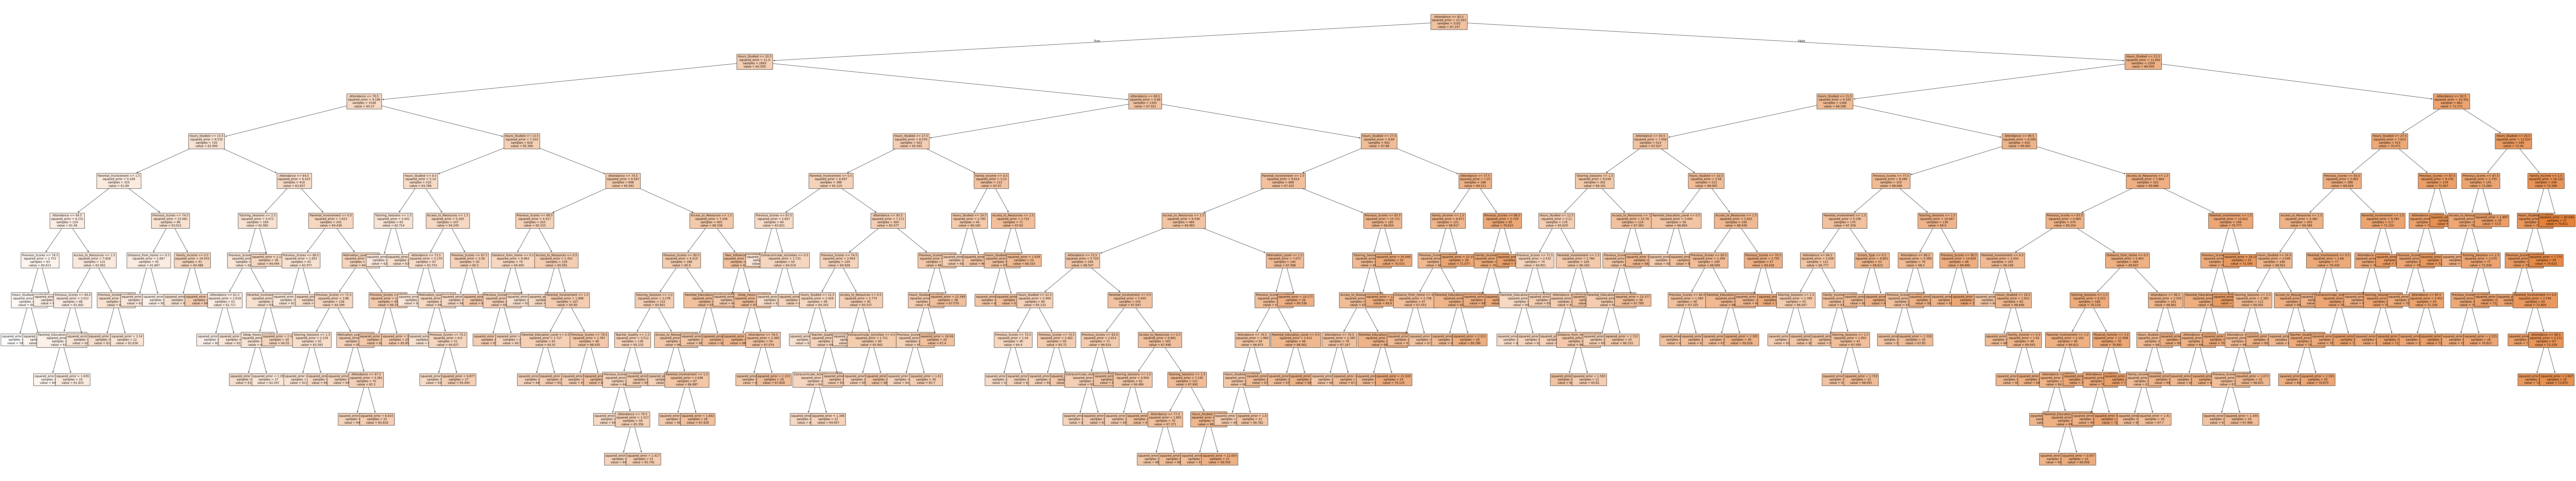

In [29]:
best_params = study.best_trial.params
model = DecisionTreeRegressor(
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split']
)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(160, 30))
plot_tree(model, filled=True, feature_names=X_train.columns,fontsize=10)
plt.show()


In [30]:
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                       Feature  Importance
1                   Attendance    0.524498
0                Hours_Studied    0.309566
6              Previous_Scores    0.053189
2         Parental_Involvement    0.032454
3          Access_to_Resources    0.029066
9            Tutoring_Sessions    0.017234
10               Family_Income    0.012324
16    Parental_Education_Level    0.005943
7             Motivation_Level    0.004694
17          Distance_from_Home    0.003970
4   Extracurricular_Activities    0.001701
5                  Sleep_Hours    0.001463
11             Teacher_Quality    0.001325
13              Peer_Influence    0.001219
14           Physical_Activity    0.000835
12                 School_Type    0.000518
8              Internet_Access    0.000000
15       Learning_Disabilities    0.000000
18                      Gender    0.000000
